In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


deliveries = pd.read_csv("deliveries.csv")

deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


# handling null values 

In [16]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type              0
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [18]:
deliveries['extras_type'].fillna('No Extra', inplace=True)
deliveries['player_dismissed'].fillna('Survived', inplace=True)
deliveries['dismissal_kind'].fillna('Not Out', inplace=True)
deliveries['fielder'].fillna('na', inplace=True)

deliveries.head(100)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,Survived,Not Out,na
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,Survived,Not Out,na
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,Survived,Not Out,na
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,Survived,Not Out,na
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,Survived,Not Out,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,15,2,DJ Hussey,AA Noffke,BB McCullum,1,0,1,No Extra,0,Survived,Not Out,na
96,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,15,3,BB McCullum,AA Noffke,DJ Hussey,2,0,2,No Extra,0,Survived,Not Out,na
97,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,15,4,BB McCullum,AA Noffke,DJ Hussey,0,0,0,No Extra,0,Survived,Not Out,na
98,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,15,5,BB McCullum,AA Noffke,DJ Hussey,1,0,1,No Extra,0,Survived,Not Out,na


In [20]:
deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

# Hence There are no Null Values Now

# understanding the structure and basic characteristics of the dataset.

In [21]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

# descriptive statistics for all the numerical columns in the dataset. 

In [22]:
deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


# Importing New Dataset ie. Matches

In [7]:
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


# Handling Null Values

In [45]:
matches.isnull().sum()
# there were null values which were taken care off

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [47]:
matches['city'] = matches['city'].fillna('Neutral')
matches['player_of_match'] = matches['player_of_match'].fillna('Not Declared')
matches['winner'] = matches['winner'].fillna('No Result')
matches['result_margin'] = matches['result_margin'].fillna(0)
matches['target_runs'] = matches['target_runs'].fillna(0)
matches['target_overs'] = matches['target_overs'].fillna(0)
matches['method'] = matches['method'].fillna('Completed Game')

matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,20.0,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,20.0,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,20.0,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,20.0,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,20.0,BF Bowden,K Hariharan


# understanding the structure and basic characteristics of the dataset.

In [48]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1095 non-null   float64
 15  target_overs     1095 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [50]:
matches.describe()

,id,result_margin,target_runs,target_overs,method
count,1.095000e+03,1095.000000,1095.000000,1095.000000,1095.000000
mean,9.048283e+05,16.959817,165.230137,19.705205,19.705205
std,3.677402e+05,21.714792,34.487313,1.887000,1.887000
min,3.359820e+05,0.000000,0.000000,0.000000,0.000000
25%,5.483315e+05,5.000000,146.000000,20.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000,20.000000
75%,1.254062e+06,19.000000,187.000000,20.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000,20.000000


# Merging Both Data for complete analysis

In [49]:
# Merging deliveries with match details using match_id
merged_df = deliveries.merge(matches, left_on='match_id', right_on='id', how='left')

# Check the merged data
merged_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,20.0,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,20.0,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,20.0,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,20.0,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,20.0,Asad Rauf,RE Koertzen


In [53]:
# Checking for missing values after merging
merged_df.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
id                  0
season              0
city                0
date                0
match_type          0
player_of_match     0
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin       0
target_runs         0
target_overs        0
super_over          0
method              0
umpire1             0
umpire2             0
dtype: int64

In [54]:
merged_df.dtypes

match_id              int64
inning                int64
batting_team         object
bowling_team         object
over                  int64
ball                  int64
batter               object
bowler               object
non_striker          object
batsman_runs          int64
extra_runs            int64
total_runs            int64
extras_type          object
is_wicket             int64
player_dismissed     object
dismissal_kind       object
fielder              object
id                    int64
season               object
city                 object
date                 object
match_type           object
player_of_match      object
venue                object
team1                object
team2                object
toss_winner          object
toss_decision        object
winner               object
result               object
result_margin       float64
target_runs         float64
target_overs        float64
super_over           object
method              float64
umpire1             

In [56]:
# Removing duplicate rows
merged_df.drop_duplicates(inplace=True)

In [58]:
# Saving cleaned data
merged_df.to_csv('cleaned_ipl_data.csv', index=False)

# Top Run Scorers

In [59]:
top_scorers = merged_df.groupby('batter')['batsman_runs'].sum().reset_index()

top_scorers = top_scorers.sort_values('batsman_runs', ascending=False).head(10)

# Display top 10 run-scorers
print("\n Top 10 Run Scorers:")
print(top_scorers)



 Top 10 Run Scorers:
             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843


# Top Wicket-Takers

In [60]:
# Filter only wicket deliveries (non-NA player_dismissed)
wicket_df = merged_df[merged_df['player_dismissed'].notna()]

# Count the number of wickets per bowler
top_wicket_takers = wicket_df.groupby('bowler')['player_dismissed'].count().reset_index()

# Rename column
top_wicket_takers.rename(columns={'player_dismissed': 'wickets'}, inplace=True)

top_wicket_takers = top_wicket_takers.sort_values('wickets', ascending=False).head(10)

# Display top 10 wicket-takers
print("\n Top 10 Wicket-Takers:")
print(top_wicket_takers)



 Top 10 Wicket-Takers:
              bowler  wickets
355         R Ashwin     4679
446        SP Narine     4146
71           B Kumar     4060
348        PP Chawla     3895
373        RA Jadeja     3895
524        YS Chahal     3628
163  Harbhajan Singh     3496
8           A Mishra     3444
119         DJ Bravo     3296
494         UT Yadav     3190


# Best Strike Rate (Min 100 Balls Faced)

In [61]:
balls_faced = merged_df.groupby('batter')['ball'].count().reset_index()
runs_scored = merged_df.groupby('batter')['batsman_runs'].sum().reset_index()

# Merge both DataFrames
strike_rate_df = pd.merge(runs_scored, balls_faced, on='batter')

#strike rate
strike_rate_df['strike_rate'] = (strike_rate_df['batsman_runs'] / strike_rate_df['ball']) * 100

# Filter players with at least 100 balls faced
strike_rate_df = strike_rate_df[strike_rate_df['ball'] >= 100]

# Sort by strike rate in descending order
top_strike_rate = strike_rate_df.sort_values('strike_rate', ascending=False).head(10)

print("\n Top 10 Strike Rates (Min 100 Balls Faced):")
print(top_strike_rate[['batter', 'strike_rate']])



 Top 10 Strike Rates (Min 100 Balls Faced):
              batter  strike_rate
234  J Fraser-McGurk   220.000000
652         WG Jacks   172.932331
433          PD Salt   169.610390
606         T Stubbs   169.456067
617          TM Head   168.558952
39        AD Russell   164.224422
105      BCJ Cutting   163.013699
208        H Klaasen   161.990212
503  Ramandeep Singh   160.377358
85   Ashutosh Sharma   160.169492


# Plotting the Results

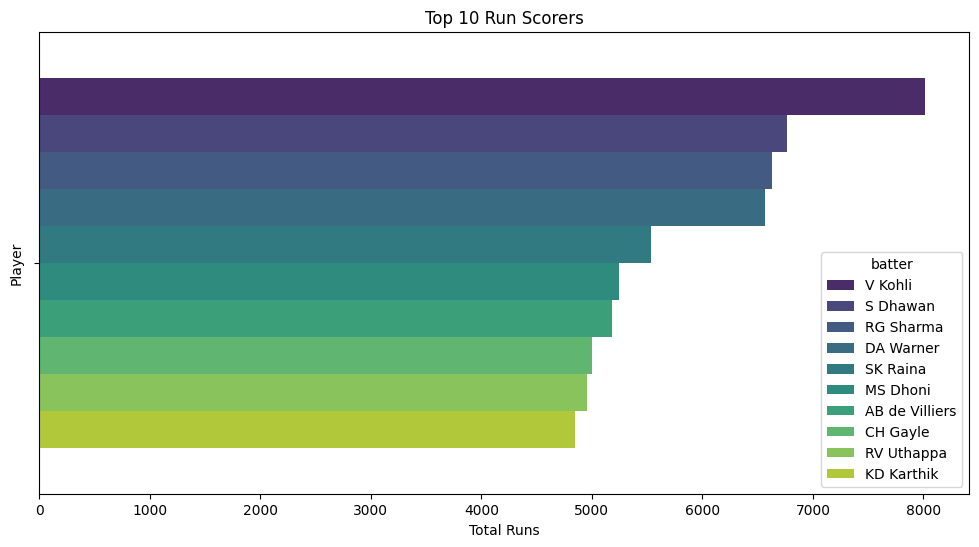

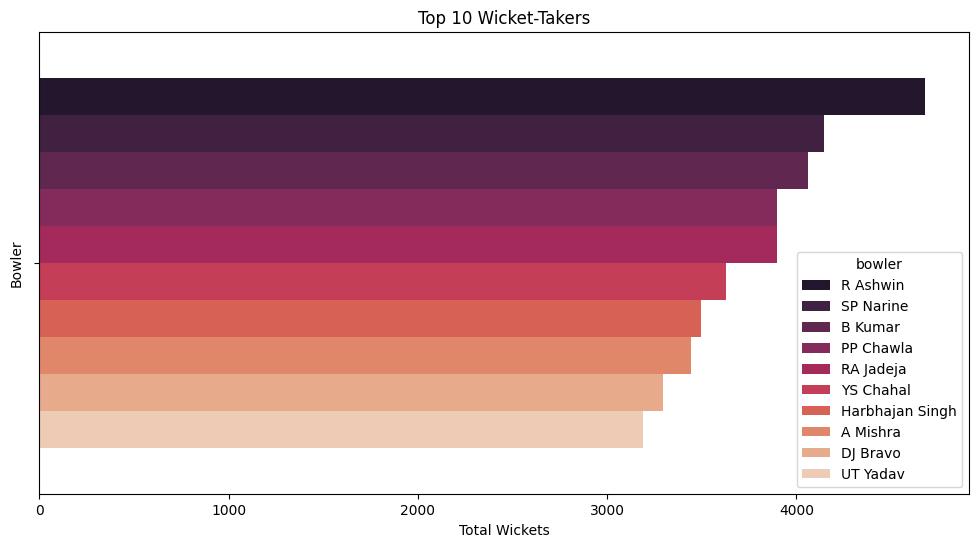

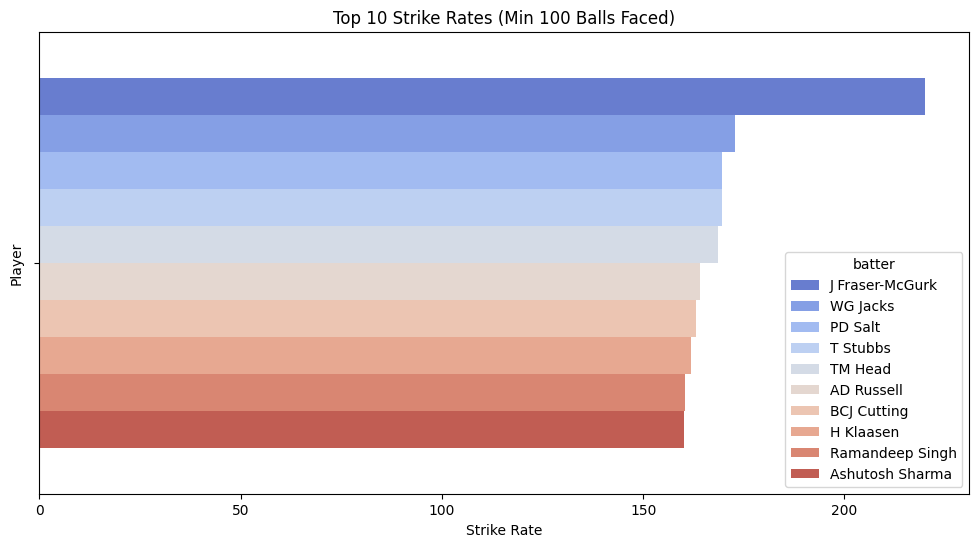

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman_runs', hue ='batter', data=top_scorers, palette='viridis')
plt.title('Top 10 Run Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.show()

# Plotting top wicket-takers
plt.figure(figsize=(12, 6))
sns.barplot(x='wickets', hue ='bowler', data=top_wicket_takers, palette='rocket')
plt.title('Top 10 Wicket-Takers')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

# Plotting top strike rates
plt.figure(figsize=(12, 6))
sns.barplot(x='strike_rate', hue ='batter', data=top_strike_rate, palette='coolwarm')
plt.title('Top 10 Strike Rates (Min 100 Balls Faced)')
plt.xlabel('Strike Rate')
plt.ylabel('Player')
plt.show()

# Calculate Win/Loss Ratio

In [66]:
#total matches played by each team
matches_played = pd.concat([merged_df['team1'], merged_df['team2']]).value_counts().reset_index()
matches_played.columns = ['team', 'matches_played']

# Count wins by each team
team_wins = merged_df['winner'].value_counts().reset_index()
team_wins.columns = ['team', 'wins']

# Merge the two DataFrames
win_loss_df = pd.merge(matches_played, team_wins, on='team', how='left').fillna(0)

# Calculate losses
win_loss_df['losses'] = win_loss_df['matches_played'] - win_loss_df['wins']

# Calculate win/loss ratio
win_loss_df['win_loss_ratio'] = win_loss_df['wins'] / win_loss_df['losses'].replace(0, np.nan)

# Sort by win/loss ratio
win_loss_df = win_loss_df.sort_values('win_loss_ratio', ascending=False).fillna(0)

# Display results
print("\n Win/Loss Ratio by Team:")
print(win_loss_df)



 Win/Loss Ratio by Team:
                           team  matches_played   wins  losses  win_loss_ratio
12               Gujarat Titans           10795   6793    4002        1.697401
15       Rising Pune Supergiant            3828   2383    1445        1.649135
2           Chennai Super Kings           57227  33388   23839        1.400562
13         Lucknow Super Giants           10626   5932    4694        1.263741
0                Mumbai Indians           62942  34629   28313        1.223078
8                Delhi Capitals           22162  11641   10521        1.106454
1         Kolkata Knight Riders           59177  30820   28357        1.086857
4              Rajasthan Royals           52674  27029   25645        1.053968
3   Royal Challengers Bangalore           56563  27319   29244        0.934175
6           Sunrisers Hyderabad           43560  20946   22614        0.926240
5               Kings XI Punjab           45129  20948   24181        0.866300
16  Royal Challengers Beng

# Highest and Lowest Team Scores

In [68]:
# Group by match_id and team, summing the total runs for each match
team_scores = merged_df.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Find highest and lowest team scores
highest_scores = team_scores.sort_values('total_runs', ascending=False).head(10)
lowest_scores = team_scores.sort_values('total_runs', ascending=True).head(10)

print("\n Top 10 Highest Team Scores:")
print(highest_scores)

print("\n Bottom 10 Lowest Team Scores:")
print(lowest_scores)



 Top 10 Highest Team Scores:
      match_id                 batting_team  total_runs
2104   1426268          Sunrisers Hyderabad         287
2060   1422126          Sunrisers Hyderabad         277
2076   1422134        Kolkata Knight Riders         272
2114   1426273          Sunrisers Hyderabad         266
702     598027  Royal Challengers Bangalore         263
2128   1426280                 Punjab Kings         262
2103   1426268  Royal Challengers Bengaluru         262
2127   1426280        Kolkata Knight Riders         261
1972   1359512         Lucknow Super Giants         257
2129   1426281               Delhi Capitals         257

 Bottom 10 Lowest Team Scores:
      match_id                 batting_team  total_runs
1021    829813  Royal Challengers Bangalore           2
1486   1178424             Rajasthan Royals          41
858     733993          Sunrisers Hyderabad          44
1264   1082648        Kolkata Knight Riders          48
1205   1082617  Royal Challengers Bangalor

# Plot the Results

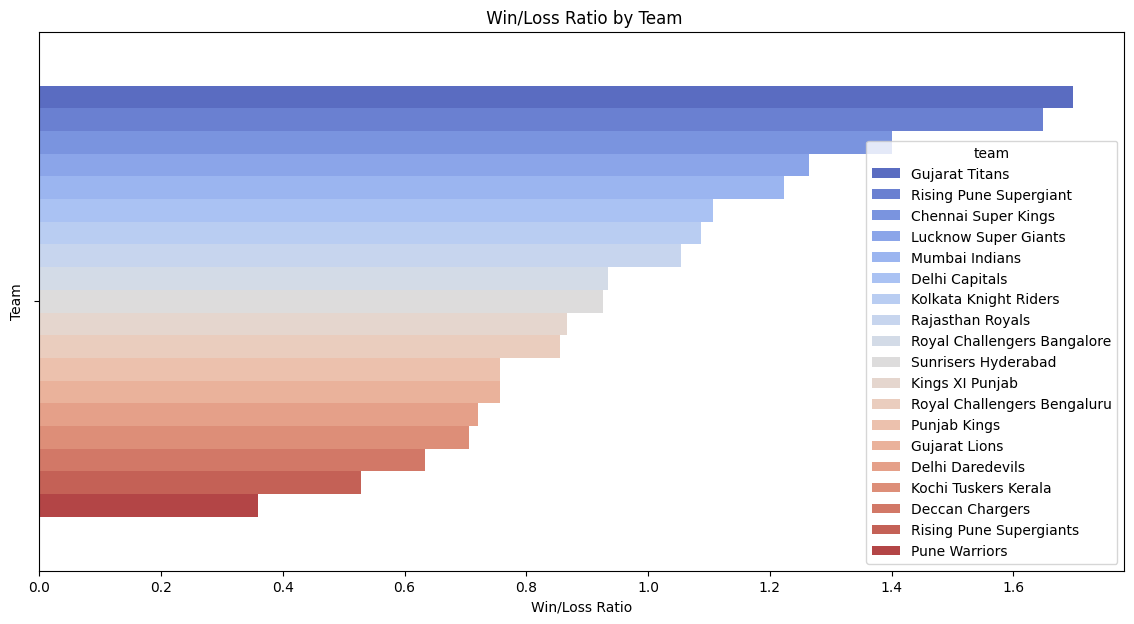

In [70]:
# Plotting Win/Loss Ratio
plt.figure(figsize=(14, 7))
sns.barplot(x='win_loss_ratio', hue ='team', data=win_loss_df.sort_values('win_loss_ratio', ascending=False), palette='coolwarm')
plt.title(' Win/Loss Ratio by Team')
plt.xlabel('Win/Loss Ratio')
plt.ylabel('Team')
plt.show()


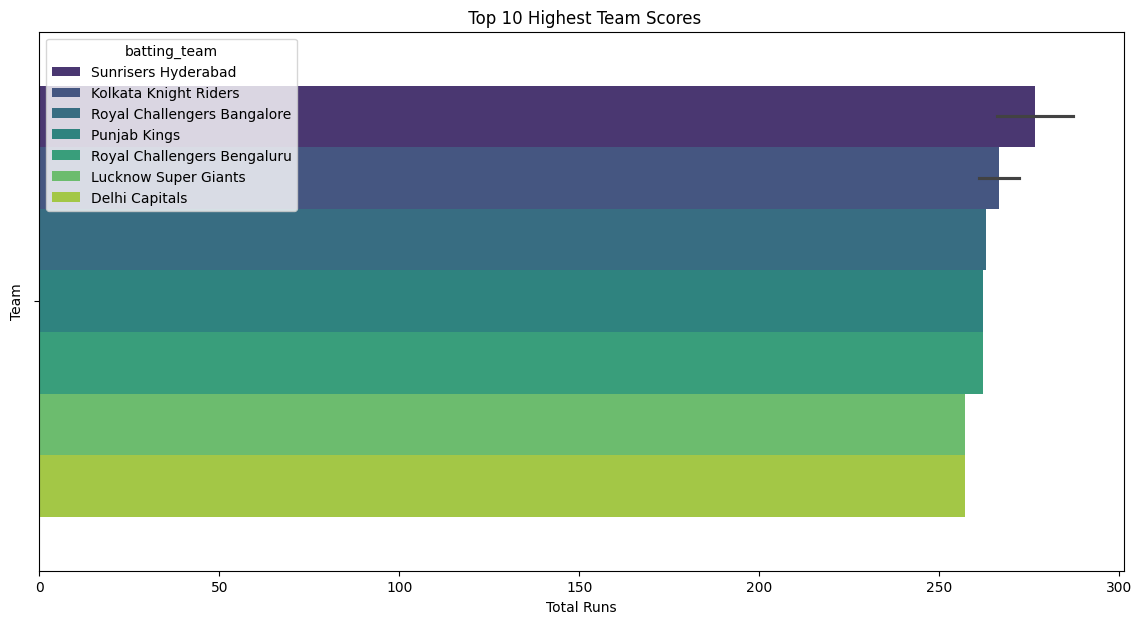

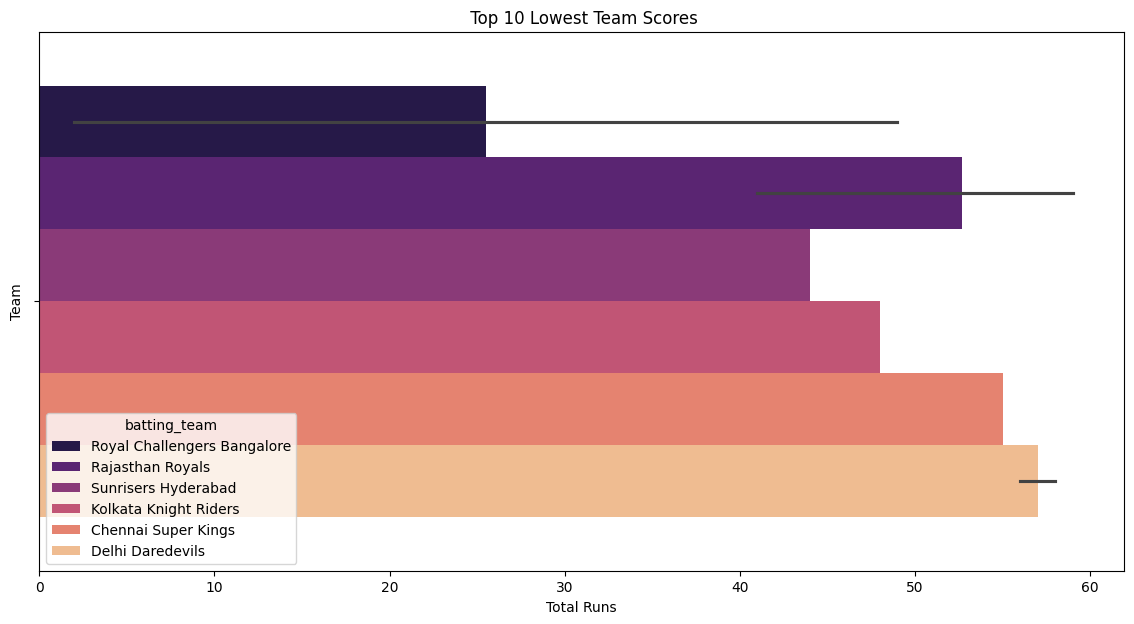

In [72]:
# Plot Highest Team Scores
plt.figure(figsize=(14, 7))
sns.barplot(x='total_runs', hue ='batting_team', data=highest_scores, palette='viridis')
plt.title(' Top 10 Highest Team Scores')
plt.xlabel('Total Runs')
plt.ylabel('Team')
plt.show()

# Plot Lowest Team Scores
plt.figure(figsize=(14, 7))
sns.barplot(x='total_runs', hue ='batting_team', data=lowest_scores, palette='magma')
plt.title(' Top 10 Lowest Team Scores')
plt.xlabel('Total Runs')
plt.ylabel('Team')
plt.show()


# Calculated Run Rates by Team and Match

In [74]:
# Group by match_id and team to calculate total runs and total balls faced
run_rate_df = merged_df.groupby(['match_id', 'batting_team']).agg(
    total_runs=('total_runs', 'sum'),
    balls_faced=('ball', 'count')
).reset_index()

# Convert balls to overs (6 balls = 1 over)
run_rate_df['overs'] = run_rate_df['balls_faced'] // 6 + (run_rate_df['balls_faced'] % 6) / 6

# Calculate run rate
run_rate_df['run_rate'] = run_rate_df['total_runs'] / run_rate_df['overs'].replace(0, np.nan)

print("\n Run Rate by Team and Match:")
print(run_rate_df.head(10))



 Run Rate by Team and Match:
   match_id                 batting_team  total_runs  balls_faced      overs  \
0    335982        Kolkata Knight Riders         222          124  20.666667   
1    335982  Royal Challengers Bangalore          82          101  16.833333   
2    335983          Chennai Super Kings         240          124  20.666667   
3    335983              Kings XI Punjab         207          124  20.666667   
4    335984             Delhi Daredevils         132           97  16.166667   
5    335984             Rajasthan Royals         129          122  20.333333   
6    335985               Mumbai Indians         165          123  20.500000   
7    335985  Royal Challengers Bangalore         166          123  20.500000   
8    335986              Deccan Chargers         110          118  19.666667   
9    335986        Kolkata Knight Riders         112          122  20.333333   

    run_rate  
0  10.741935  
1   4.871287  
2  11.612903  
3  10.016129  
4   8.164948  

In [75]:
boundaries_df = merged_df[merged_df['batsman_runs'] == 4].groupby('batting_team').size().reset_index(name='boundaries')
sixes_df = merged_df[merged_df['batsman_runs'] == 6].groupby('batting_team').size().reset_index(name='sixes')

# Merge the data
boundary_six_df = pd.merge(boundaries_df, sixes_df, on='batting_team', how='outer').fillna(0)

# Display the data
print("\n Boundaries and Sixes by Team:")
print(boundary_six_df)


 Boundaries and Sixes by Team:
                   batting_team  boundaries  sixes
0           Chennai Super Kings        3196   1509
1               Deccan Chargers         957    400
2                Delhi Capitals        1352    550
3              Delhi Daredevils        2156    801
4                 Gujarat Lions         460    155
5                Gujarat Titans         691    271
6               Kings XI Punjab        2631   1075
7          Kochi Tuskers Kerala         170     53
8         Kolkata Knight Riders        3461   1495
9          Lucknow Super Giants         577    332
10               Mumbai Indians        3637   1685
11                Pune Warriors         525    196
12                 Punjab Kings         795    440
13             Rajasthan Royals        3091   1237
14       Rising Pune Supergiant         197     89
15      Rising Pune Supergiants         171     68
16  Royal Challengers Bangalore        3149   1488
17  Royal Challengers Bengaluru         229    165

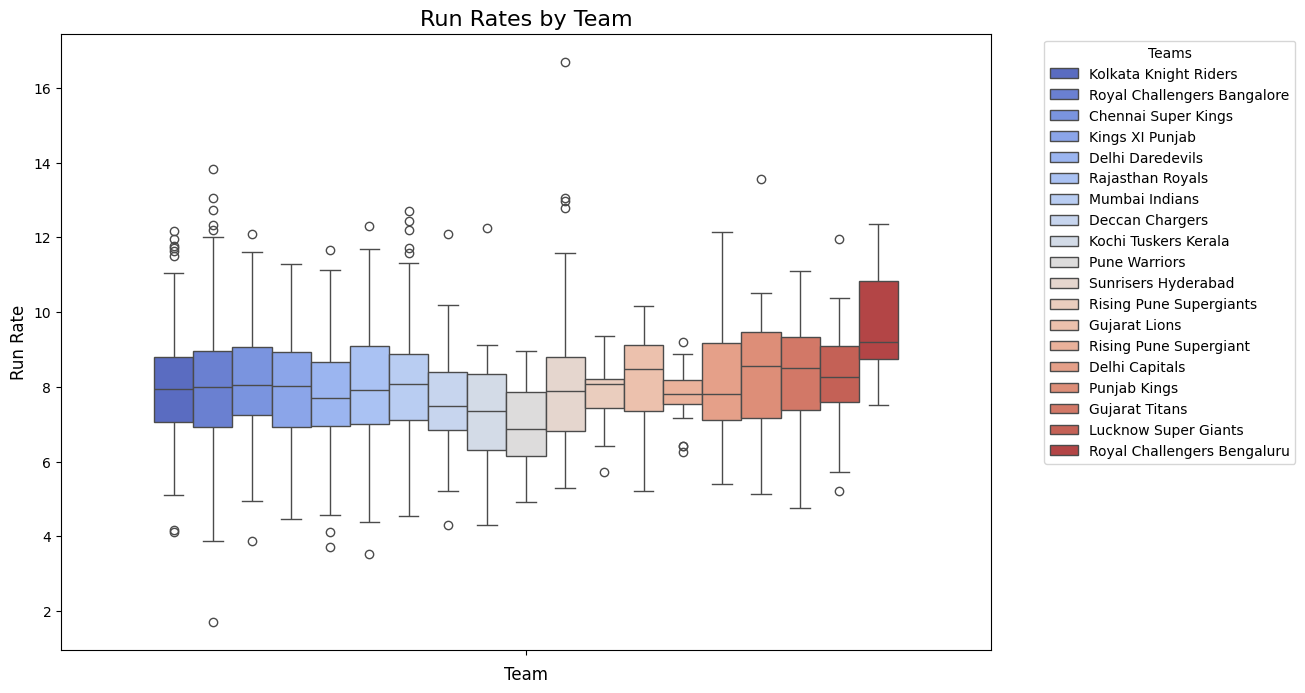

In [86]:
plt.figure(figsize=(12, 8))

sns.boxplot(hue='batting_team', y='run_rate', data=run_rate_df, palette='coolwarm')

plt.title('Run Rates by Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Run Rate', fontsize=12)

plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


# Boundaries and Sixes Visualization

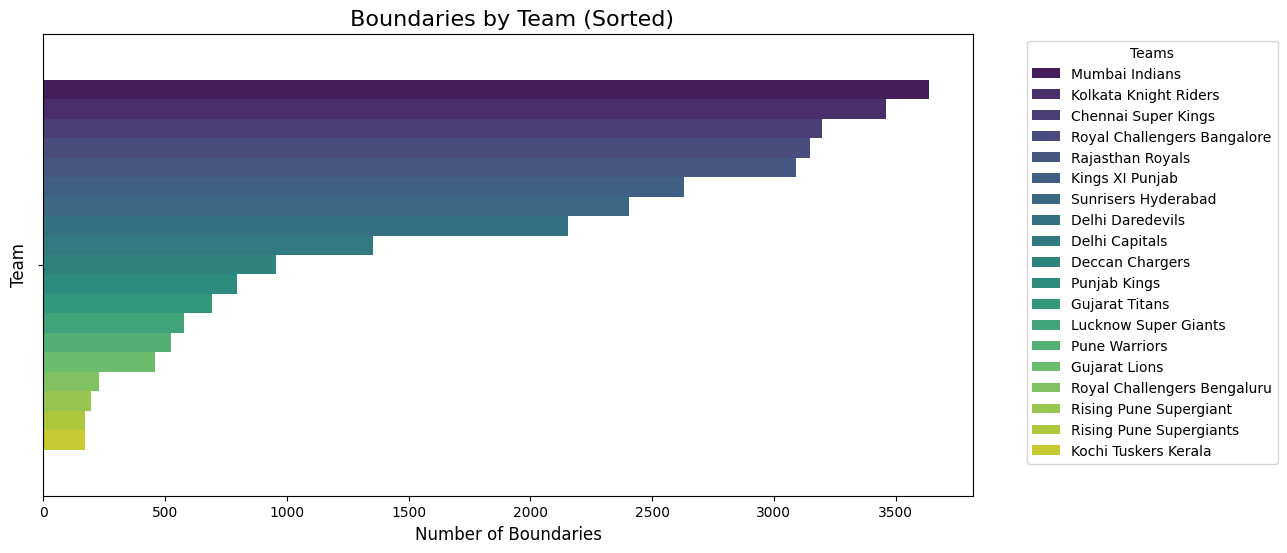

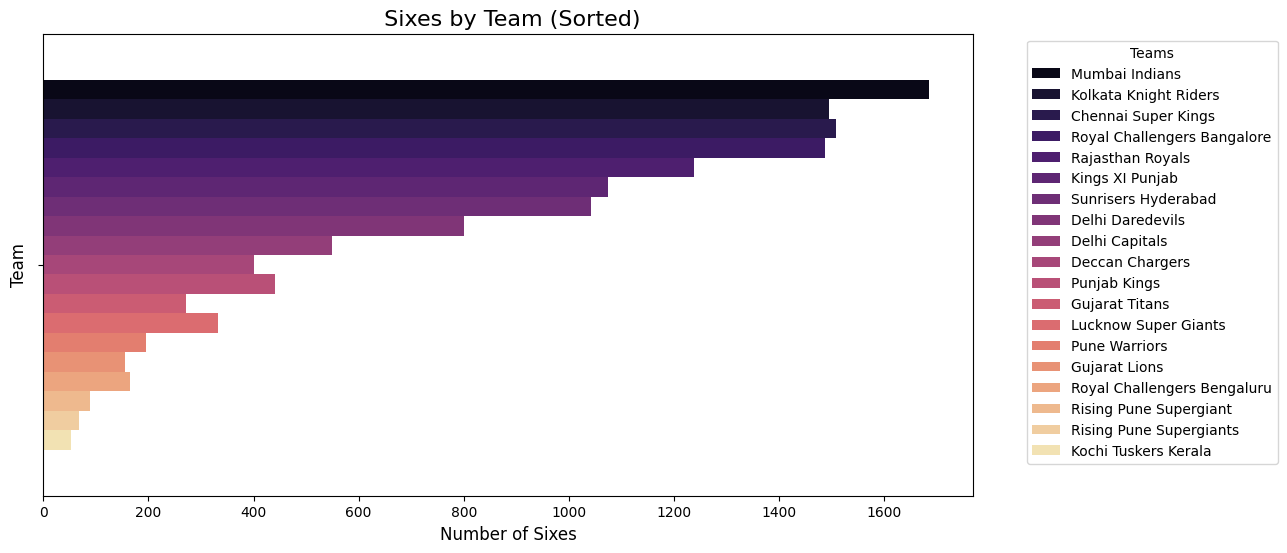

In [89]:
sorted_df = boundary_six_df.sort_values(by=['boundaries', 'sixes'], ascending=[False, False])

plt.figure(figsize=(12, 6))
sns.barplot(x='boundaries', hue ='batting_team', data=sorted_df, palette='viridis')

plt.title(' Boundaries by Team (Sorted)', fontsize=16)
plt.xlabel('Number of Boundaries', fontsize=12)
plt.ylabel('Team', fontsize=12)

plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='sixes', hue ='batting_team', data=sorted_df, palette='magma')

plt.title(' Sixes by Team (Sorted)', fontsize=16)
plt.xlabel('Number of Sixes', fontsize=12)
plt.ylabel('Team', fontsize=12)

# Move legend outside the plot
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# lets check if Toss Winners Have a Higher Win Percentage

In [90]:
# Checking how many times the toss winner also won the match
toss_win = merged_df[merged_df['toss_winner'] == merged_df['winner']]

# Calculating the win percentages
total_matches = len(merged_df)
toss_winner_matches = len(toss_win)
toss_win_percentage = (toss_winner_matches / total_matches) * 100

# Overall win percentage for reference
overall_win_percentage = (len(merged_df['winner'].dropna()) / total_matches) * 100

# Display the results
print("\n Toss Winner Stats:")
print(f"Total Matches: {total_matches}")
print(f"Matches where Toss Winner also Won: {toss_winner_matches}")
print(f"Toss Winner Win Percentage: {toss_win_percentage:.2f}%")
print(f"Overall Win Percentage: {overall_win_percentage:.2f}%")



 Toss Winner Stats:
Total Matches: 260920
Matches where Toss Winner also Won: 131334
Toss Winner Win Percentage: 50.33%
Overall Win Percentage: 100.00%


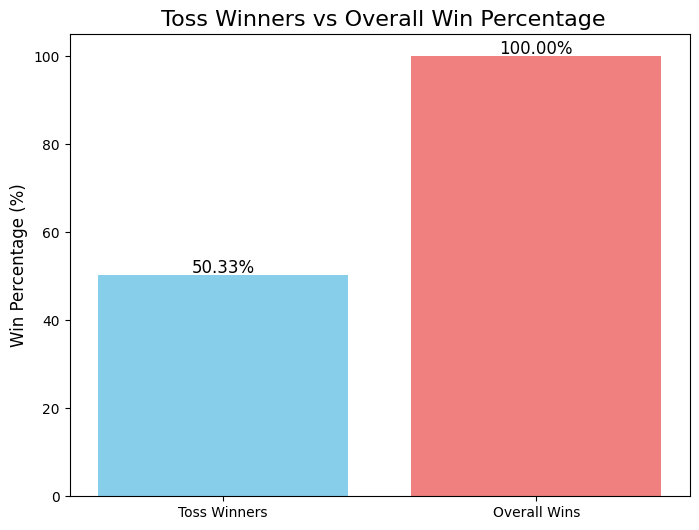

In [93]:
data = {'Toss Winners': toss_win_percentage,'Overall Wins': overall_win_percentage}

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(data.keys(), data.values(), color=['skyblue', 'lightcoral'])

# Labels
plt.title(' Toss Winners vs Overall Win Percentage', fontsize=16)
plt.ylabel('Win Percentage (%)', fontsize=12)

# Display values on top of the bars
for i, v in enumerate(data.values()):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=12)

plt.show()


# Bowlers Who Conceded the Most Extras

In [94]:
# deliveries with extras
extras_df = merged_df[merged_df['extra_runs'] > 0]

# Group by bowler and sum the extras
bowler_extras = extras_df.groupby('bowler')['extra_runs'].sum().reset_index()

# Sort by extras conceded
bowler_extras = bowler_extras.sort_values(by='extra_runs', ascending=False)

# Display the bowlers with the most extras
print("\n Bowlers with the Most Extras Conceded:")
print(bowler_extras.head(10))



 Bowlers with the Most Extras Conceded:
             bowler  extra_runs
64          B Kumar         307
392      SL Malinga         292
104        DJ Bravo         258
322        R Ashwin         257
439        UT Yadav         257
304         P Kumar         236
148        I Sharma         235
173       JJ Bumrah         227
275  Mohammed Siraj         218
143        HV Patel         212


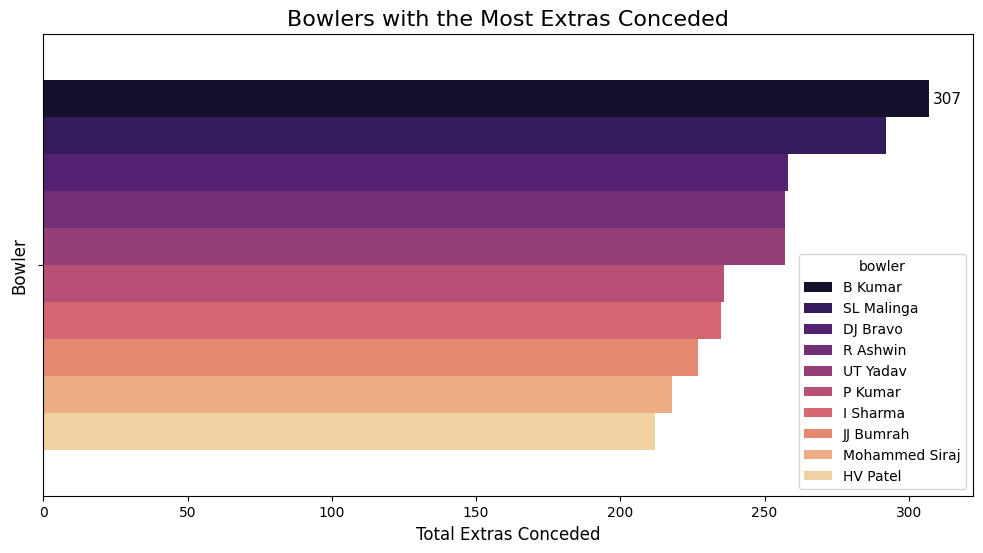

In [97]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
bar_plot = sns.barplot(x='extra_runs', hue ='bowler', data=top_bowlers, palette='magma', ax=ax)

plt.title('Bowlers with the Most Extras Conceded', fontsize=16)
plt.xlabel('Total Extras Conceded', fontsize=12)
plt.ylabel('Bowler', fontsize=12)

# Display values on top of the bars
ax.bar_label(bar_plot.containers[0], fmt='%d', label_type='edge', fontsize=11, color='black', padding=3)

plt.show()

# Bowlers Who Dismissed the Same Batsmen the Most Times

In [98]:
# Filter for wicket deliveries
wickets_df = merged_df[merged_df['is_wicket'] == 1]

# Select relevant columns
wicket_details = wickets_df[['bowler', 'player_dismissed']]

# Group by bowler and batsman, then count occurrences
bowler_batsman_df = wicket_details.groupby(['bowler', 'player_dismissed']).size().reset_index(name='dismissals')

# Sort by the most dismissals
top_dismissals = bowler_batsman_df.sort_values('dismissals', ascending=False).reset_index(drop=True)

# Display the top 10
print("\n Top 10 Bowler-Batsman Combinations:")
print(top_dismissals.head(10))



 Top 10 Bowler-Batsman Combinations:
           bowler player_dismissed  dismissals
0       SP Narine        RG Sharma           8
1        A Mishra        RG Sharma           7
2       MM Sharma        AT Rayudu           7
3  Sandeep Sharma          V Kohli           7
4         PP Ojha         MS Dhoni           7
5       RA Jadeja       GJ Maxwell           7
6        R Ashwin       RV Uthappa           7
7          Z Khan         MS Dhoni           7
8       JJ Bumrah          RR Pant           7
9         B Kumar        AM Rahane           7


C:\Users\Abhishek upadhyay\AppData\Local\Temp\ipykernel_13720\2942248401.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='dismissals', y=top_10_bowler_batsman['bowler'] + ' → ' + top_10_bowler_batsman['player_dismissed'],


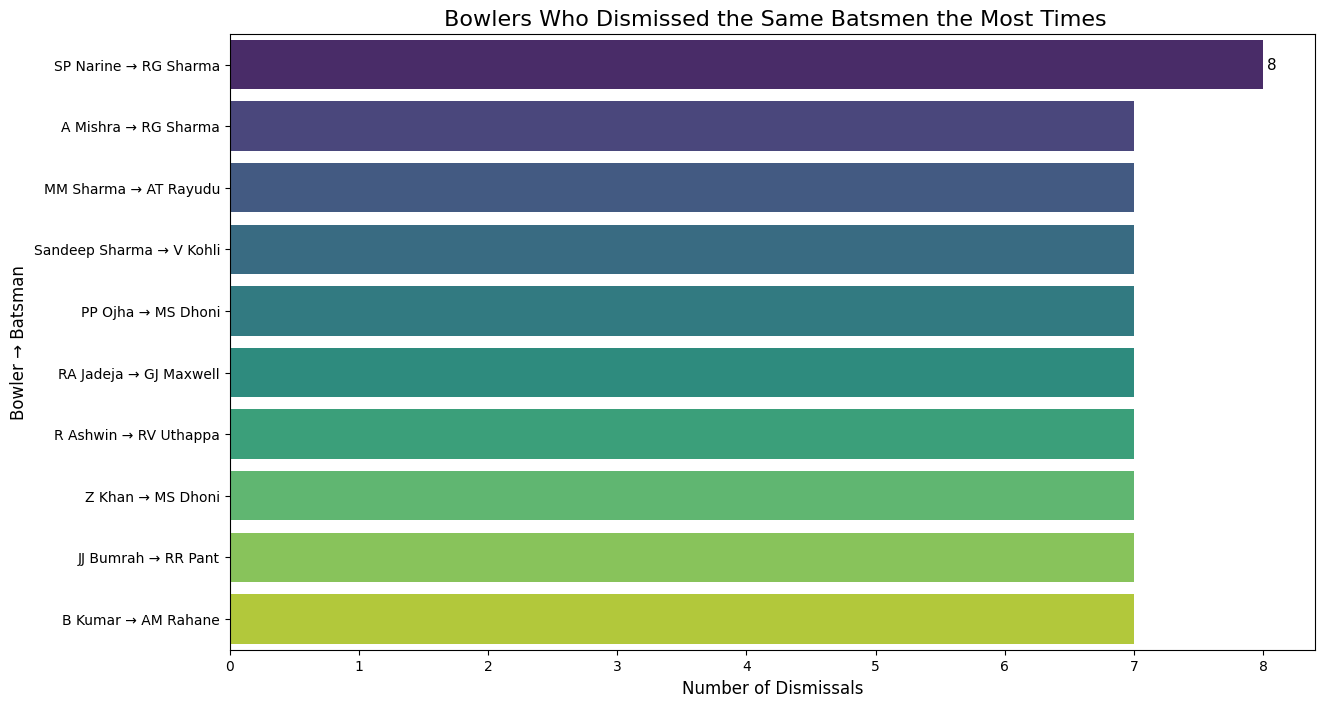

In [105]:
top_10_bowler_batsman = top_dismissals.head(10)

plt.figure(figsize=(14, 8))

ax = sns.barplot(x='dismissals', y=top_10_bowler_batsman['bowler'] + ' → ' + top_10_bowler_batsman['player_dismissed'],
                 data=top_10_bowler_batsman, palette='viridis')

# Labels and Title
plt.title(' Bowlers Who Dismissed the Same Batsmen the Most Times', fontsize=16)
plt.xlabel('Number of Dismissals', fontsize=12)
plt.ylabel('Bowler → Batsman', fontsize=12)

# Display values on top of the bars
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=11, color='black', padding=3)

plt.show()


# Which Stadiums Favor Specific Teams

In [113]:
# Count the number of wins by stadium and team
stadium_wins = merged_df.groupby(['venue', 'winner']).size().reset_index(name='wins')

# Find the team with the most wins per stadium
most_wins_per_stadium = stadium_wins.loc[stadium_wins.groupby('venue')['wins'].idxmax()].reset_index(drop=True)

# Sort by stadium name
most_wins_per_stadium = most_wins_per_stadium.sort_values('venue')

# Add a new column combining stadium and team name
most_wins_per_stadium['stadium_team'] = most_wins_per_stadium['venue'] + ' → ' + most_wins_per_stadium['winner']

# Display the results
print("\n Teams with Most Wins at Each Stadium:")
print(most_wins_per_stadium[['stadium_team', 'wins']])



 Teams with Most Wins at Each Stadium:
                                         stadium_team   wins
0               Arun Jaitley Stadium → Delhi Capitals    973
1        Arun Jaitley Stadium, Delhi → Delhi Capitals   1486
2                  Barabati Stadium → Deccan Chargers    731
3   Barsapara Cricket Stadium, Guwahati → Punjab K...    487
4   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   1714
5                  Brabourne Stadium → Mumbai Indians   1231
6          Brabourne Stadium, Mumbai → Delhi Capitals    928
7                       Buffalo Park → Mumbai Indians    253
8             De Beers Diamond Oval → Kings XI Punjab    247
9         Dr DY Patil Sports Academy → Mumbai Indians   1182
10  Dr DY Patil Sports Academy, Mumbai → Chennai S...    745
11  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...    666
12  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...    256
13  Dubai International Cricket Stadium → Chennai ...   2204
14               Eden Gardens → Kolkata Knigh

C:\Users\Abhishek upadhyay\AppData\Local\Temp\ipykernel_13720\1660244040.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='wins', y='stadium_team', data=most_wins_per_stadium, palette='coolwarm')


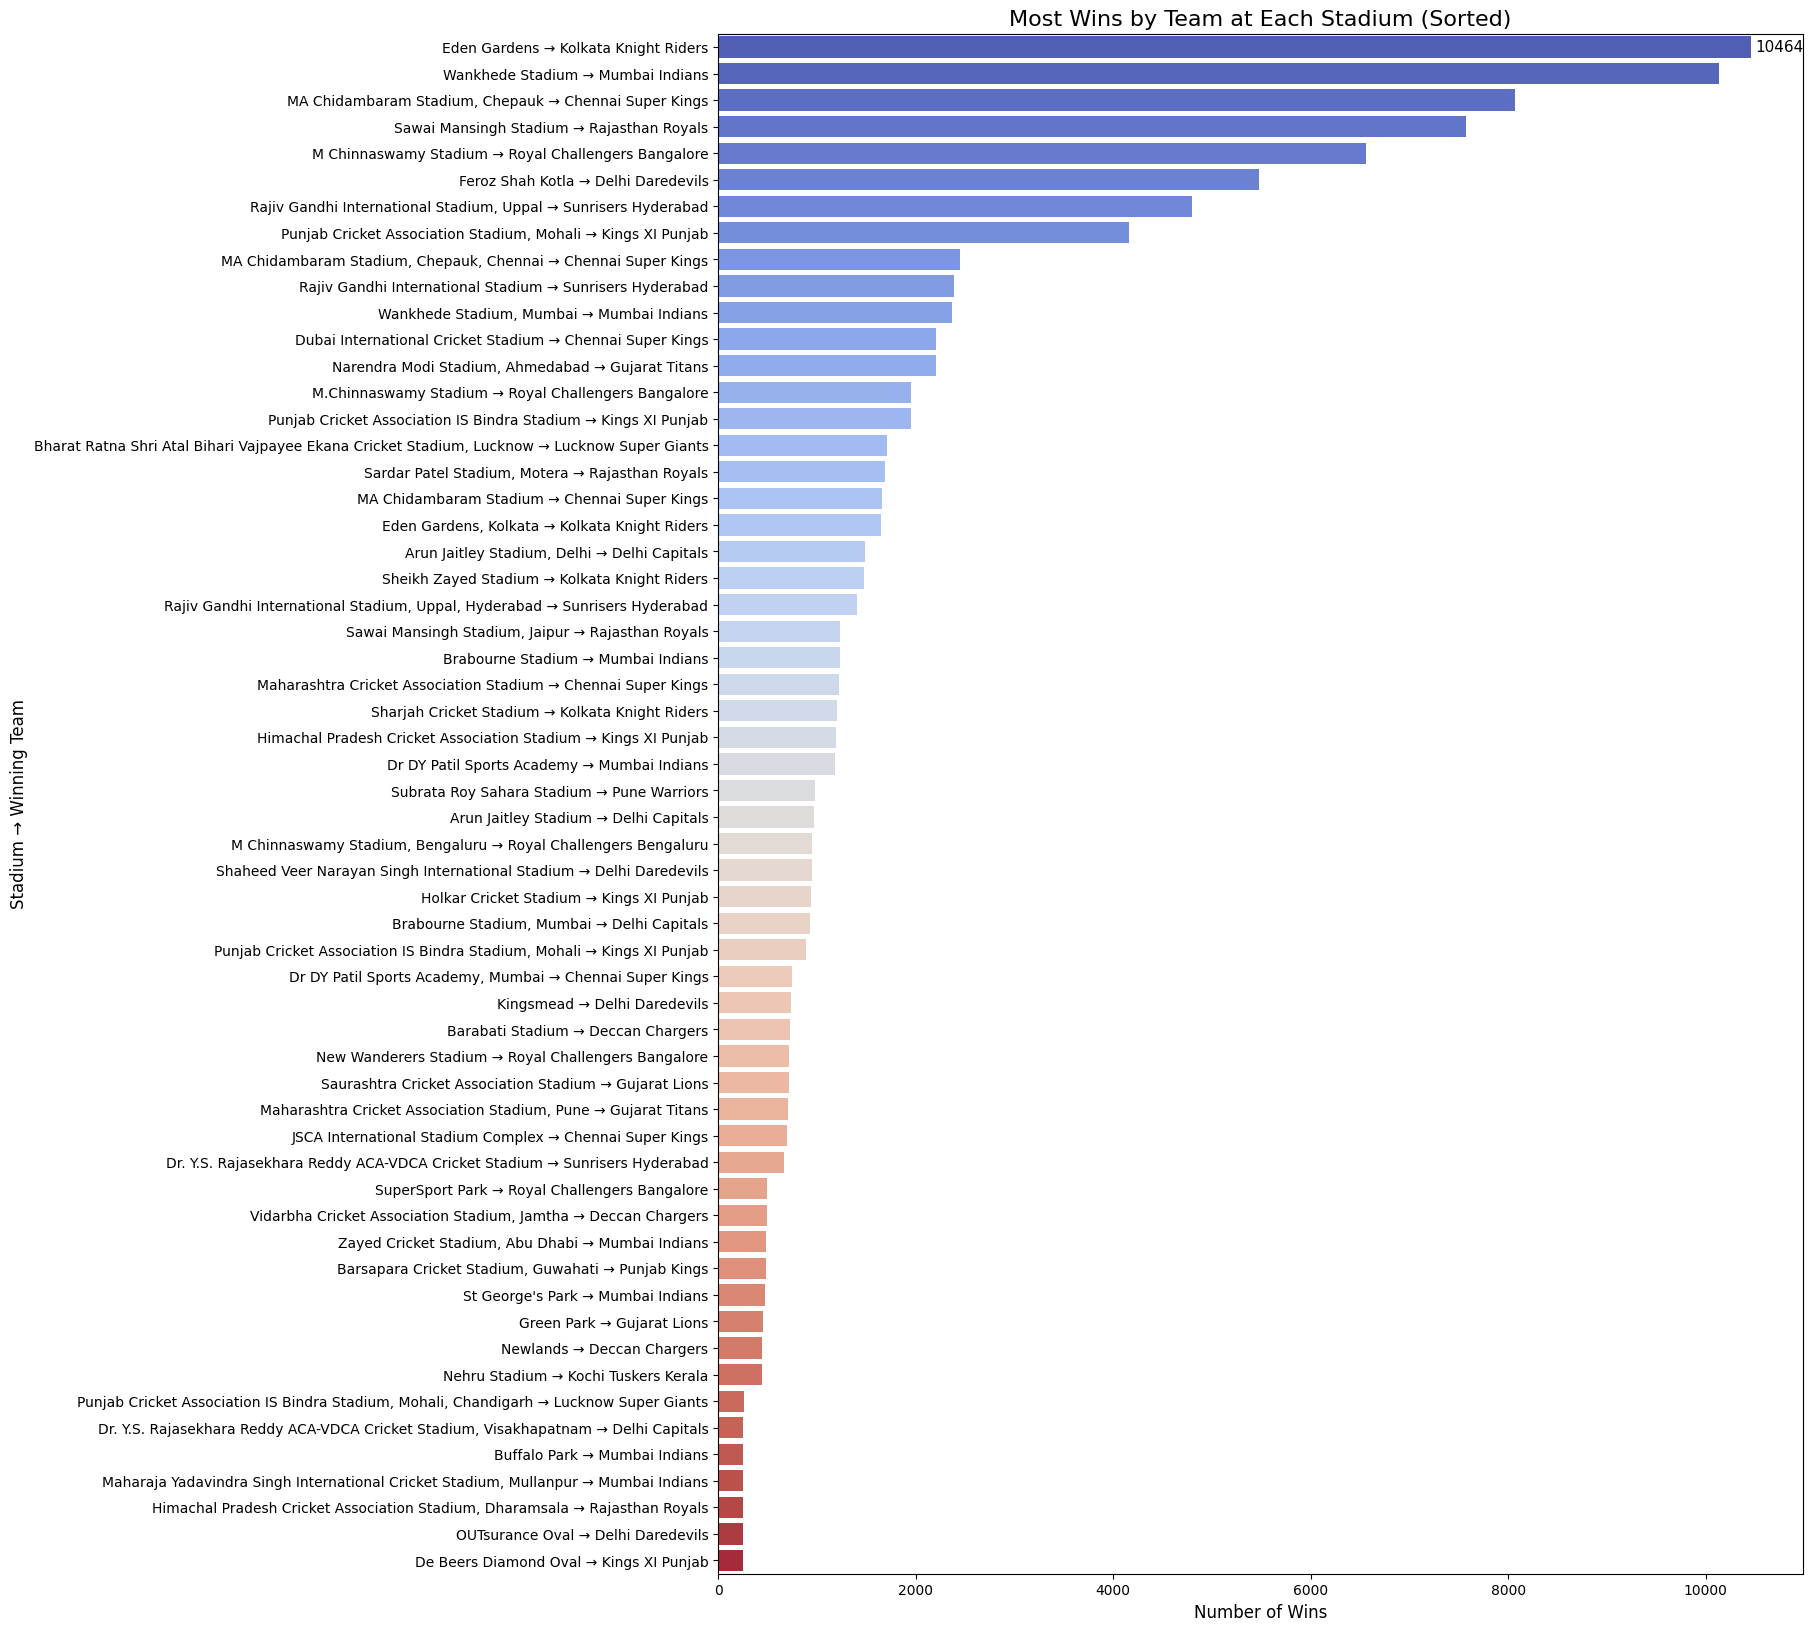

In [122]:
most_wins_per_stadium = most_wins_per_stadium.sort_values('wins', ascending=False)

plt.figure(figsize=(14, 20))

ax = sns.barplot(x='wins', y='stadium_team', data=most_wins_per_stadium, palette='coolwarm')

# Labels and Title
plt.title('Most Wins by Team at Each Stadium (Sorted)', fontsize=16)
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Stadium → Winning Team', fontsize=12)

# Display values on top of the bars
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=11, color='black', padding=3)

plt.show()


# Most Wickets at Each Stadium by Bowler

In [126]:
wicket_df = merged_df[merged_df['is_wicket'] == 1]
stadium_wickets = wicket_df.groupby(['venue', 'bowler']).size().reset_index(name='wickets')

most_wickets_per_stadium = stadium_wickets.loc[stadium_wickets.groupby('venue')['wickets'].idxmax()].reset_index(drop=True)

# Sort by stadium name
most_wickets_per_stadium = most_wickets_per_stadium.sort_values('venue')

# Add a combined name column for better visualization
most_wickets_per_stadium['stadium_bowler'] = most_wickets_per_stadium['venue'] + ' → ' + most_wickets_per_stadium['bowler']

# Display the results
print("\n Bowlers with Most Wickets at Each Stadium:")
print(most_wickets_per_stadium)



 Bowlers with Most Wickets at Each Stadium:
                                                venue           bowler  \
0                                Arun Jaitley Stadium         A Mishra   
1                         Arun Jaitley Stadium, Delhi     Mukesh Kumar   
2                                    Barabati Stadium        SP Narine   
3                 Barsapara Cricket Stadium, Guwahati        YS Chahal   
4   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...     Ravi Bishnoi   
5                                   Brabourne Stadium           Z Khan   
6                           Brabourne Stadium, Mumbai         KK Ahmed   
7                                        Buffalo Park         R Bhatia   
8                               De Beers Diamond Oval        RG Sharma   
9                          Dr DY Patil Sports Academy     DE Bollinger   
10                 Dr DY Patil Sports Academy, Mumbai        JJ Bumrah   
11  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...          A Za

C:\Users\Abhishek upadhyay\AppData\Local\Temp\ipykernel_13720\4143042734.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='wickets', y='stadium_bowler', data=most_wickets_per_stadium, palette='mako')


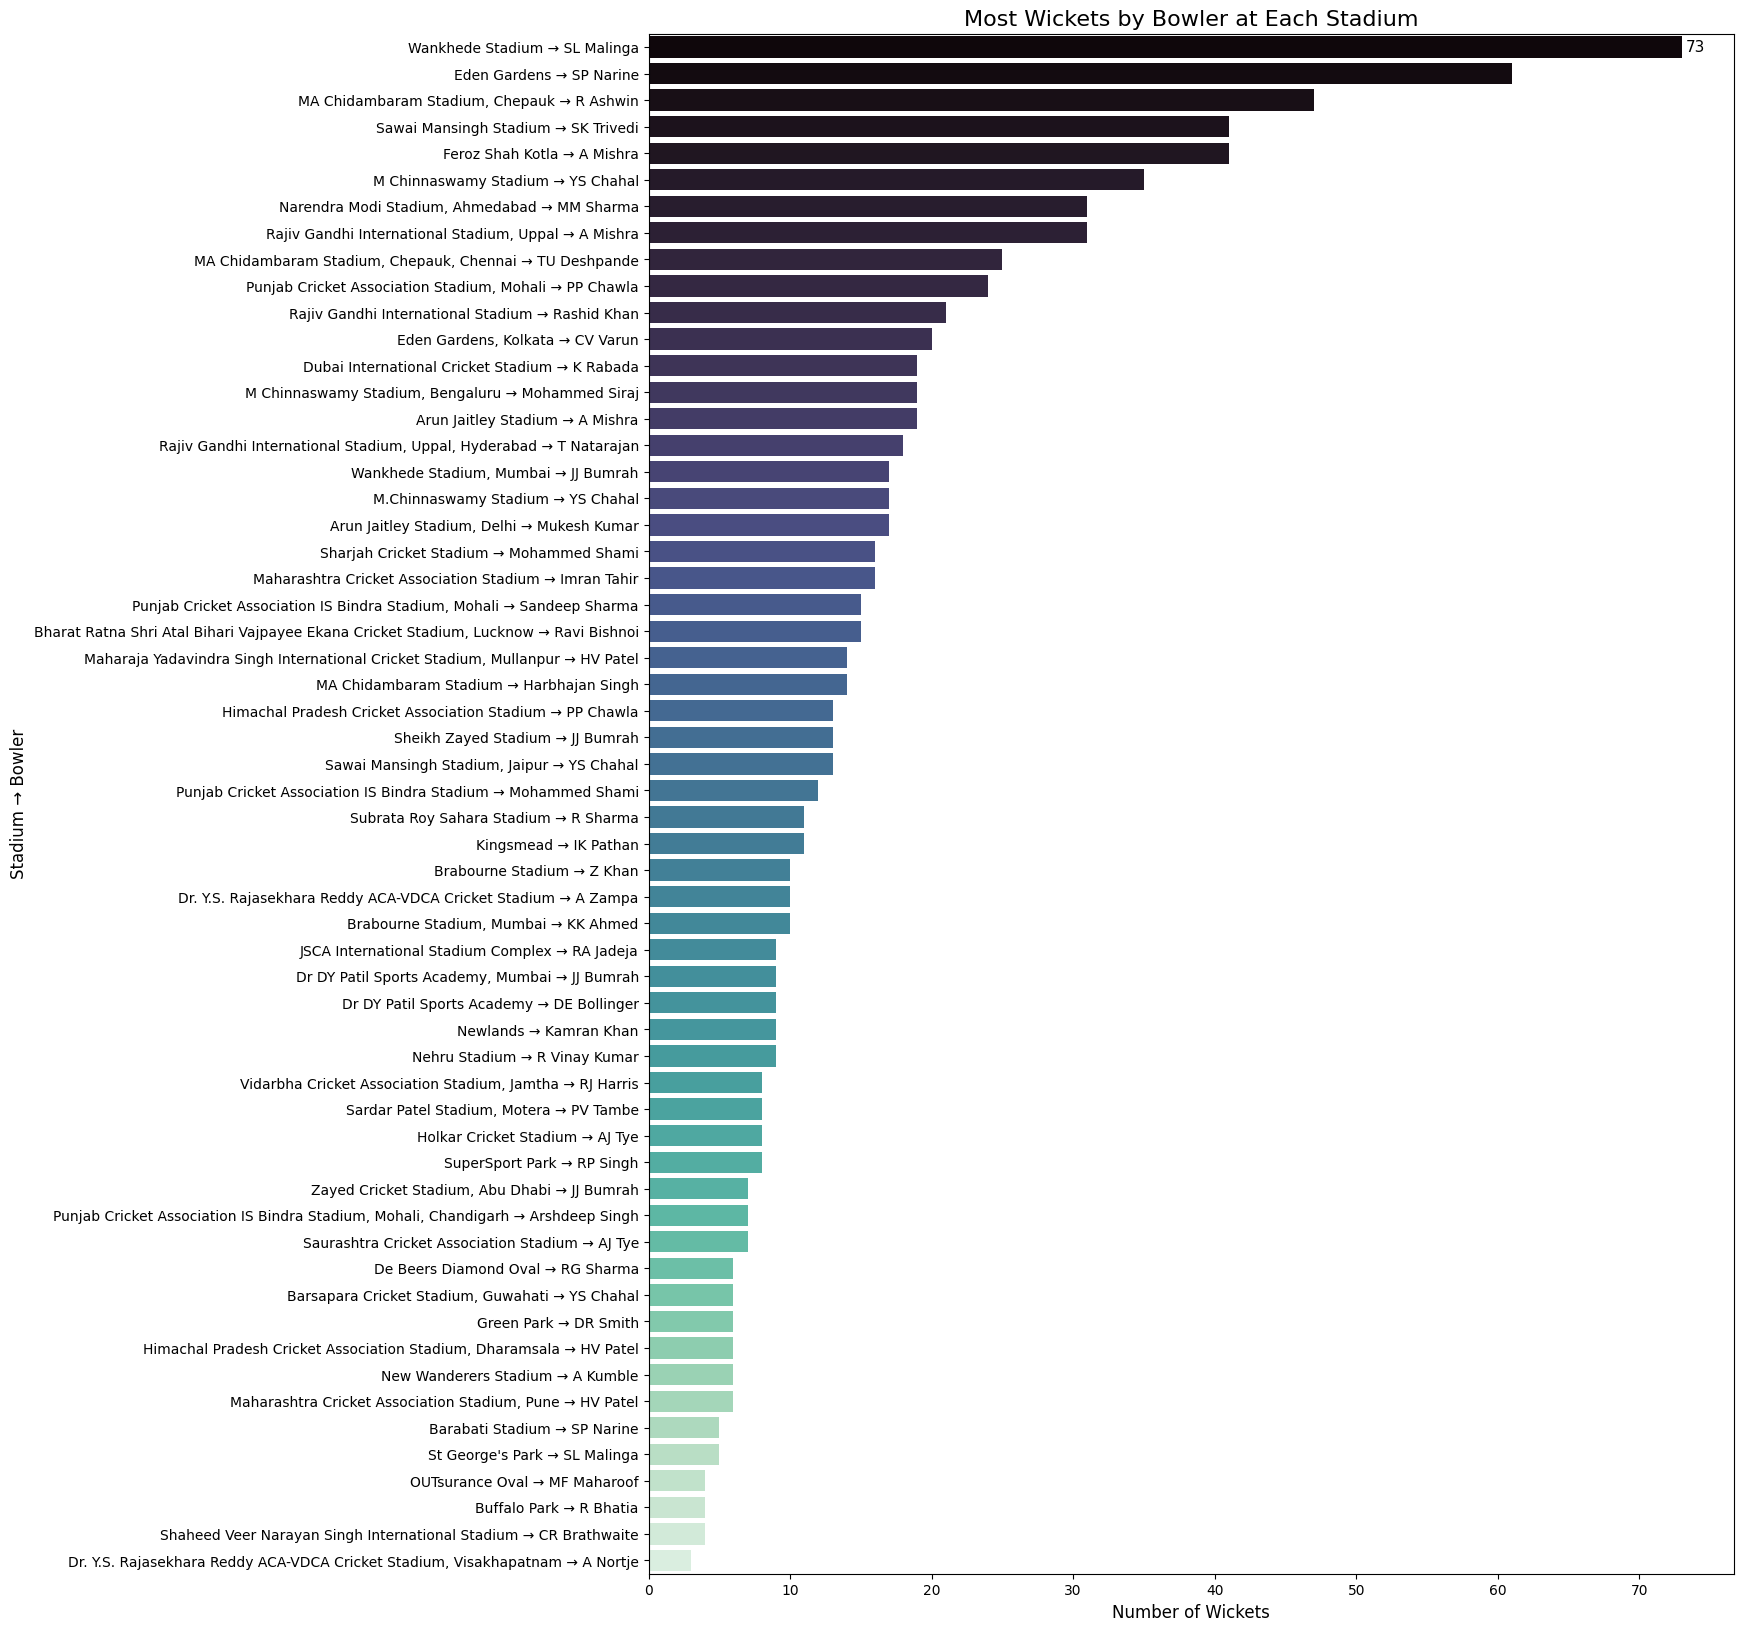

In [128]:
# Sort by wickets in descending order
most_wickets_per_stadium = most_wickets_per_stadium.sort_values('wickets', ascending=False)

# Plotting
plt.figure(figsize=(14, 20))

# Barplot
ax = sns.barplot(x='wickets', y='stadium_bowler', data=most_wickets_per_stadium, palette='mako')

# Labels and Title
plt.title('Most Wickets by Bowler at Each Stadium', fontsize=16)
plt.xlabel('Number of Wickets', fontsize=12)
plt.ylabel('Stadium → Bowler', fontsize=12)

# Display values on top of the bars
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=11, color='black', padding=3)

plt.show()


# Most Runs Scored by Batsmen at Each Stadium

In [129]:
# Group by stadium and batsman, summing the total runs
stadium_batsmen_runs = merged_df.groupby(['venue', 'batter'])['batsman_runs'].sum().reset_index(name='runs_scored')

# Find the batsman with the most runs at each stadium
most_runs_by_batsman = stadium_batsmen_runs.loc[stadium_batsmen_runs.groupby('venue')['runs_scored'].idxmax()].reset_index(drop=True)

# Sort by stadium name
most_runs_by_batsman = most_runs_by_batsman.sort_values('venue')

# Add a combined column for better visualization
most_runs_by_batsman['stadium_batsman'] = most_runs_by_batsman['venue'] + ' → ' + most_runs_by_batsman['batter']

# Display the results
print("\n Batsmen with the Most Runs at Each Stadium:")
print(most_runs_by_batsman)



 Batsmen with the Most Runs at Each Stadium:
                                                venue            batter  \
0                                Arun Jaitley Stadium           SS Iyer   
1                         Arun Jaitley Stadium, Delhi         DA Warner   
2                                    Barabati Stadium        RV Uthappa   
3                 Barsapara Cricket Stadium, Guwahati        JC Buttler   
4   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...          KL Rahul   
5                                   Brabourne Stadium         SS Tiwary   
6                           Brabourne Stadium, Mumbai         DA Warner   
7                                        Buffalo Park          BJ Hodge   
8                               De Beers Diamond Oval         A Symonds   
9                          Dr DY Patil Sports Academy        RV Uthappa   
10                 Dr DY Patil Sports Academy, Mumbai        JC Buttler   
11  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St... 

C:\Users\Abhishek upadhyay\AppData\Local\Temp\ipykernel_13720\3752376805.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='runs_scored', y='stadium_batsman', data=most_runs_by_batsman, palette='coolwarm')


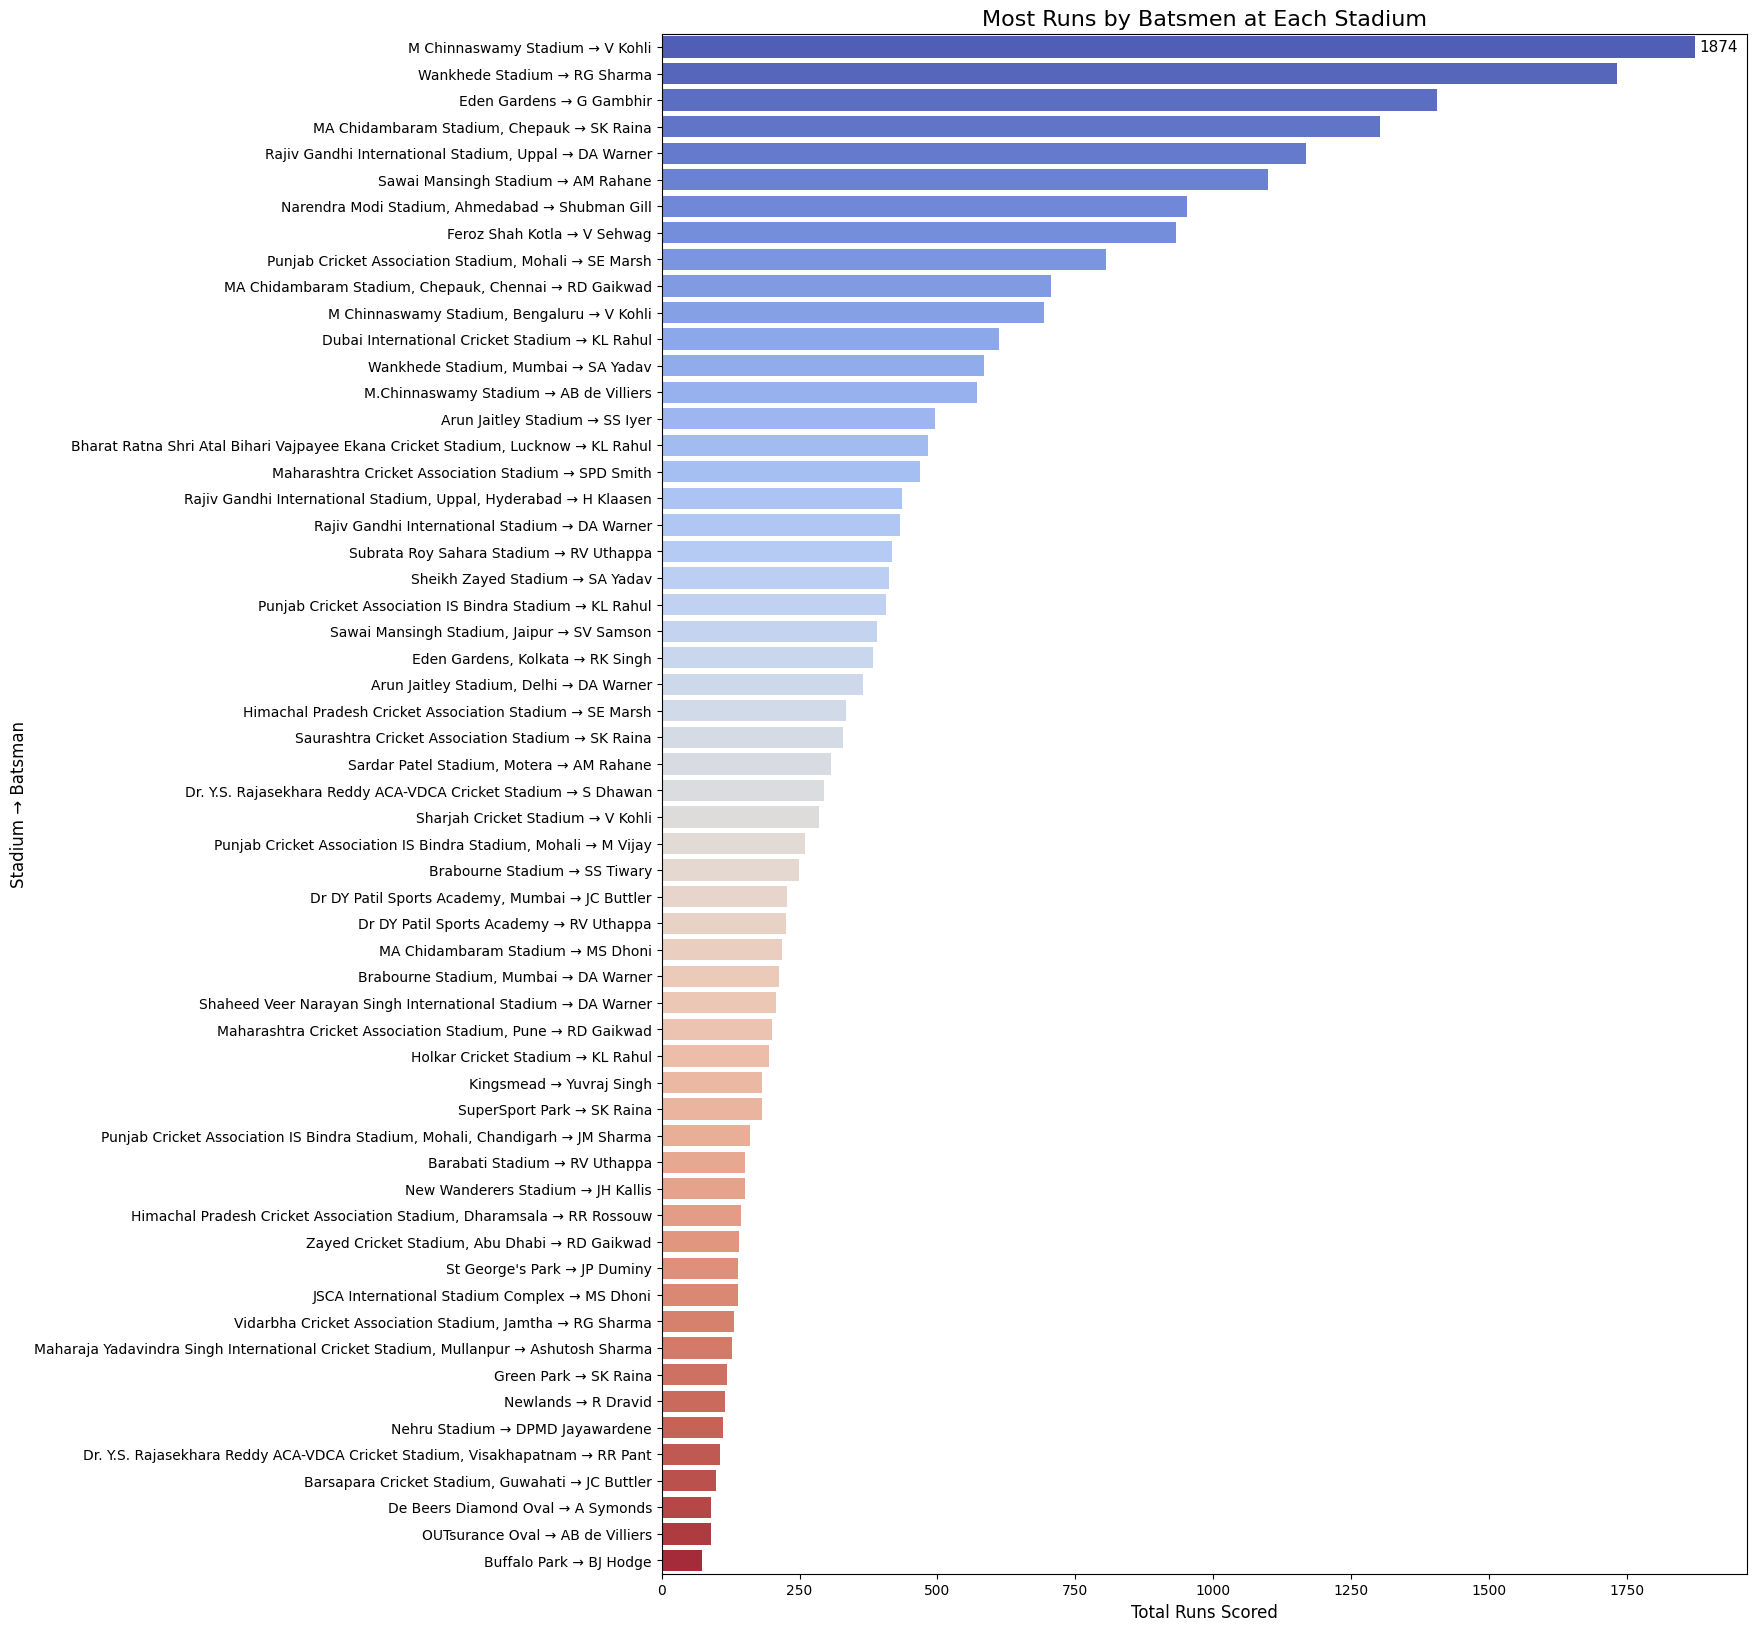

In [132]:
most_runs_by_batsman = most_runs_by_batsman.sort_values('runs_scored', ascending=False)

# Plotting
plt.figure(figsize=(14, 20))

# Barplot
ax = sns.barplot(x='runs_scored', y='stadium_batsman', data=most_runs_by_batsman, palette='coolwarm')

# Labels and Title
plt.title('Most Runs by Batsmen at Each Stadium', fontsize=16)
plt.xlabel('Total Runs Scored', fontsize=12)
plt.ylabel('Stadium → Batsman', fontsize=12)

# Display values on top of the bars
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=11, color='black', padding=3)

plt.show()


# Top 10 Venues by number of matches

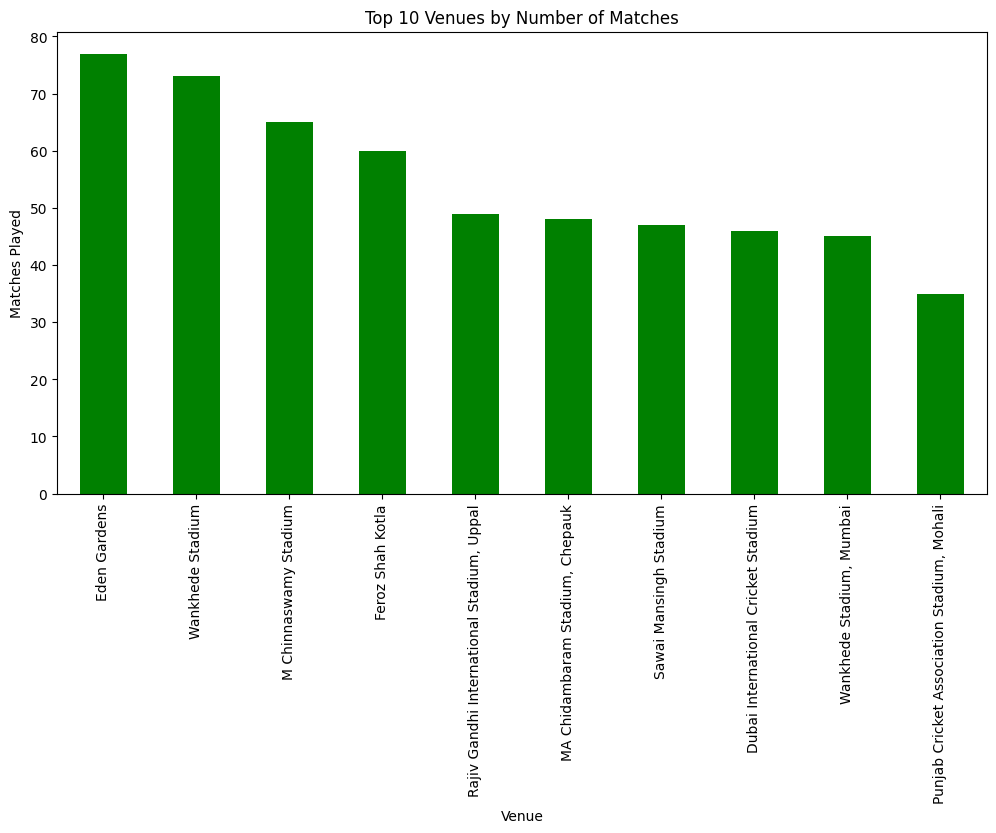

In [140]:
venue_counts = matches['venue'].value_counts().head(10)

plt.figure(figsize=(12, 6))
venue_counts.plot(kind='bar', color='green')
plt.title('Top 10 Venues by Number of Matches')
plt.xlabel('Venue')
plt.ylabel('Matches Played')

plt.show()

# umpire in most number of matches top 10

In [144]:
umpire_counts = pd.concat([merged_df['umpire1'], merged_df['umpire2']]).value_counts().reset_index()

umpire_counts.columns = ['umpire', 'matches']

top_10_umpires = umpire_counts.head(10)

print("\n Top 10 Umpires by Number of Matches:")
print(top_10_umpires)



 Top 10 Umpires by Number of Matches:
                  umpire  matches
0                 S Ravi    31543
1           AK Chaudhary    31248
2            Nitin Menon    24985
3        HDPK Dharmasena    23332
4          C Shamshuddin    20701
5            CB Gaffaney    18644
6  KN Ananthapadmanabhan    17394
7              M Erasmus    16230
8              VK Sharma    15508
9           BNJ Oxenford    15187


C:\Users\Abhishek upadhyay\AppData\Local\Temp\ipykernel_13720\3960461099.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='matches', y='umpire', data=top_10_umpires, palette='magma')


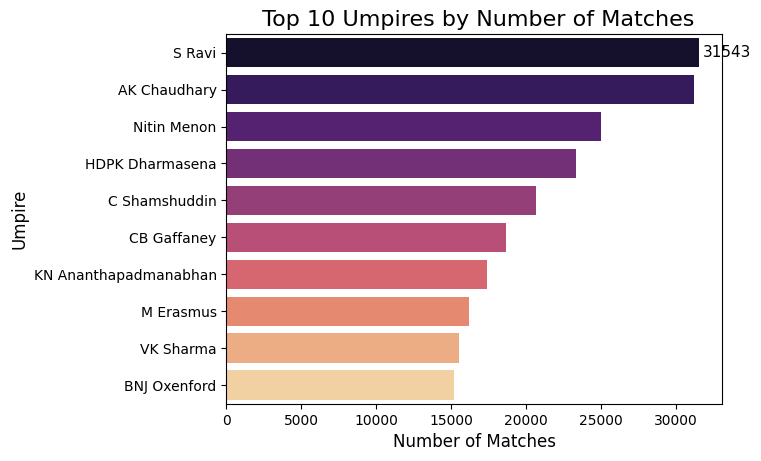

In [145]:
ax = sns.barplot(x='matches', y='umpire', data=top_10_umpires, palette='magma')

plt.title(' Top 10 Umpires by Number of Matches', fontsize=16)
plt.xlabel('Number of Matches', fontsize=12)
plt.ylabel('Umpire', fontsize=12)

ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=11, color='black', padding=3)

plt.show()

In [146]:
merged_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,20.0,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,20.0,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,20.0,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,20.0,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,20.0,Asad Rauf,RE Koertzen


# Winning and Losing Patterns by Season

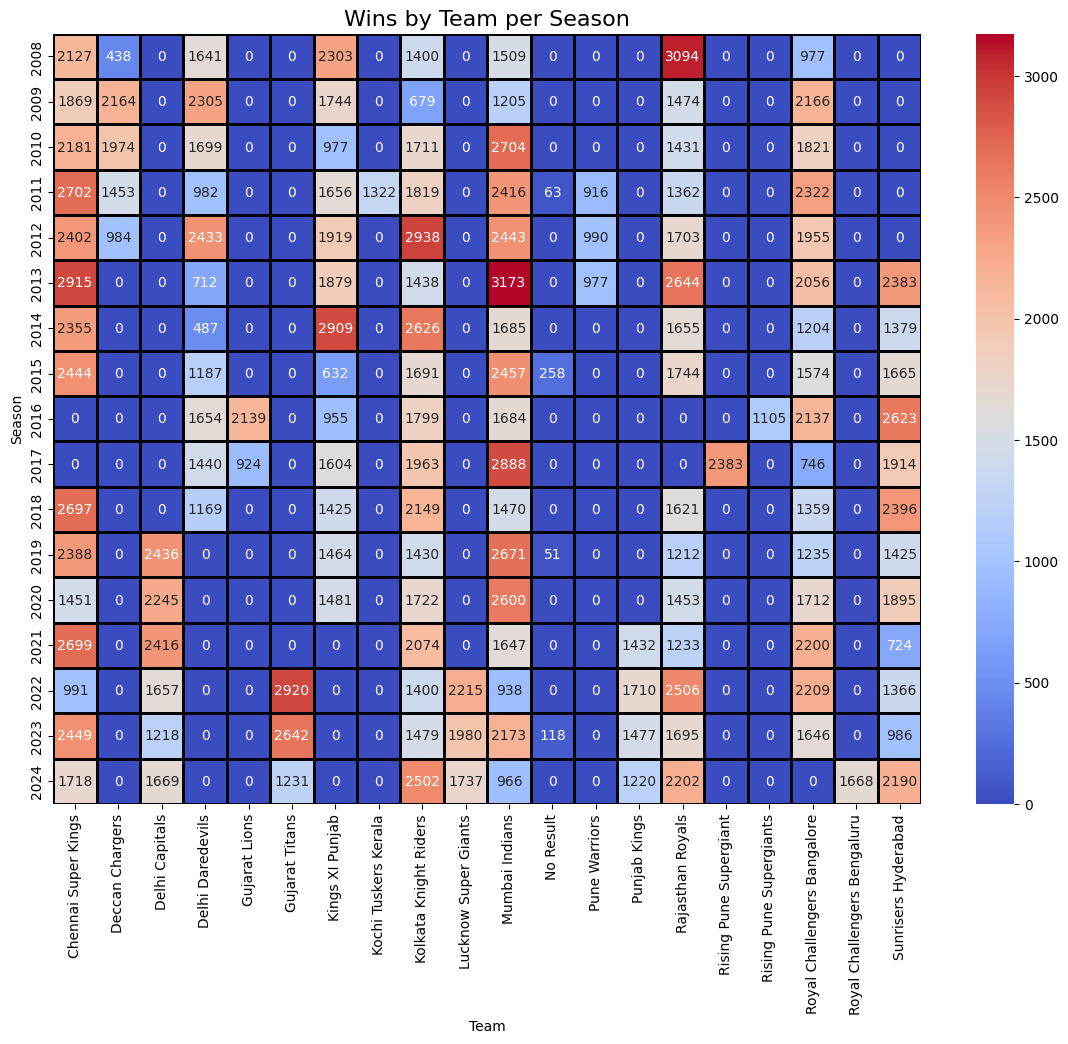

In [153]:
merged_df['season'] = pd.to_datetime(merged_df['date']).dt.year

# Count wins by team per season
season_wins = merged_df.groupby(['season', 'winner']).size().reset_index(name='wins')

# Correct pivot syntax with keyword arguments
season_wins_pivot = season_wins.pivot(index='season', columns='winner', values='wins').fillna(0)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(season_wins_pivot, annot=True, fmt='.0f', cmap='coolwarm', linewidths=1, linecolor='black')
plt.title('Wins by Team per Season', fontsize=16)
plt.xlabel('Team')
plt.ylabel('Season')
plt.show()


# players with consistent high performance.

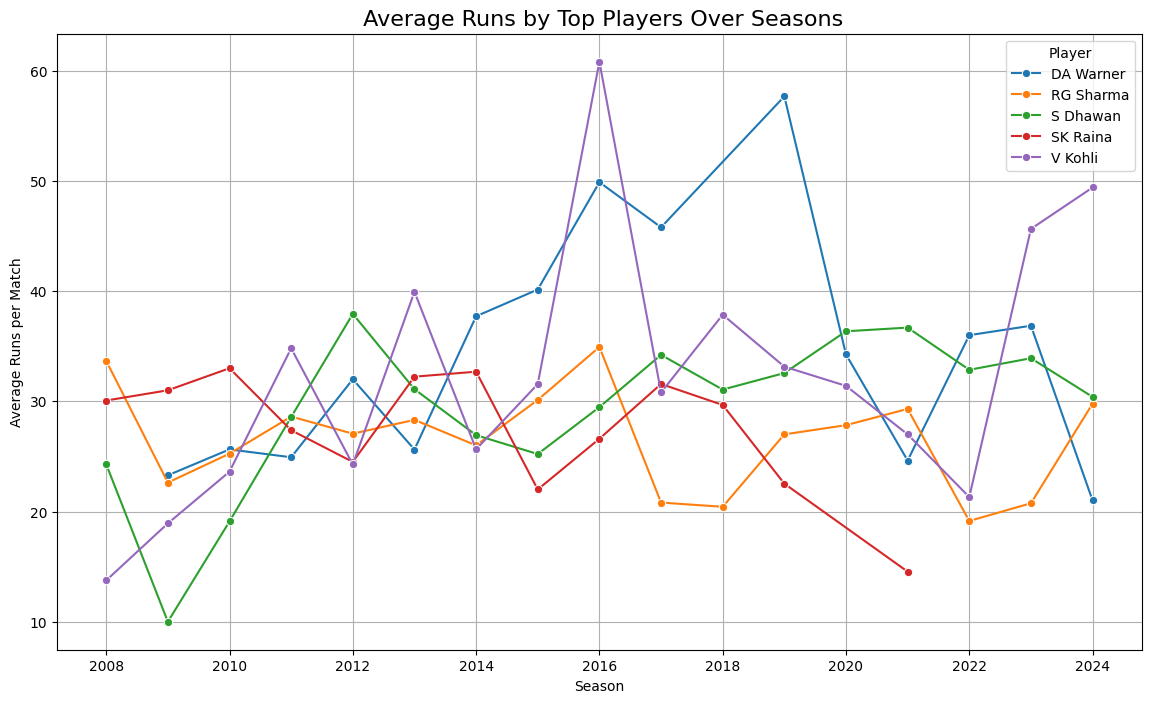

In [154]:
player_season_runs = merged_df.groupby(['batter', 'season']).agg({'batsman_runs': 'sum', 'match_id': 'nunique'}).reset_index()

player_season_runs['avg_runs'] = player_season_runs['batsman_runs'] / player_season_runs['match_id']

top_players = player_season_runs.groupby('batter')['batsman_runs'].sum().nlargest(5).index
top_players_df = player_season_runs[player_season_runs['batter'].isin(top_players)]

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x='season', y='avg_runs', hue='batter', data=top_players_df, marker='o', palette='tab10')
plt.title(' Average Runs by Top Players Over Seasons', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Average Runs per Match')
plt.legend(title='Player')
plt.grid(True)
plt.show()


# Correlation Between Strike Rate and Winning

In [156]:
# Future-proof solution
team_strike_rate = merged_df.groupby('batting_team', group_keys=False).apply(
    lambda x: (x['batsman_runs'].sum() / len(x)) * 100, include_groups=False
).reset_index(name='strike_rate')


team_wins = merged_df.groupby('winner').size().reset_index(name='wins')
team_stats = pd.merge(team_strike_rate, team_wins, left_on='batting_team', right_on='winner', how='left').fillna(0)

correlation = team_stats['strike_rate'].corr(team_stats['wins'])
print(f"\nCorrelation between Strike Rate and Wins: {correlation:.2f}")



Correlation between Strike Rate and Wins: -0.01
